# **CCEM Image processing #2**

Introduction to data filtering, segmentation and features measurement

In [ ]:
# To run only if using jupyter notebook through binder
# Install the required packages in Jupyter kernel (internet connection required)
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install matplotlib_scalebar
!{sys.executable} -m pip install scikit-image
!{sys.executable} -m pip install scipy

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_scalebar as Scalebar
import imageio as io

# Scipy and scikit-image libraries for simple image filtering, segmemtation and measurements  
import scipy.signal as signal
import skimage.filters as filters
import skimage.measure as measure
import skimage.morphology as morphology

# Additional libraries for data visualization
from skimage.color import label2rgb
from matplotlib.patches import Rectangle

Links to libraries documentation
1. Numpy ==> <https://numpy.org/doc/stable/reference/index.html>
2. imageio ==> <https://imageio.readthedocs.io/en/stable/reference/userapi.html>
3. matplotlib.pyplot ==> <https://matplotlib.org/stable/api/pyplot_summary.html>
4. matplotlib_scalebar ==> <https://pypi.org/project/matplotlib-scalebar/>
5. scikit-image ==> <https://scikit-image.org/docs/stable/api/api.html>
6. scipy ==> <https://scipy.github.io/devdocs/reference/index.html>

In [89]:
%matplotlib notebook

## Load and plot the data

In [149]:
#image = io.imread('blobs.tif')
image = io.imread('0013_Ceta.tif')[:,:,0]
print(image)
print(np.shape(image))

[[134 134 134 ... 132 149 181]
 [139 139 139 ... 156 171 154]
 [118 118 118 ... 143 160 141]
 ...
 [ 19  19  19 ... 137 117 142]
 [ 29  29  29 ... 174 135 116]
 [ 10  10  10 ... 162 151 134]]
(2048, 2048)


<IPython.core.display.Javascript object>


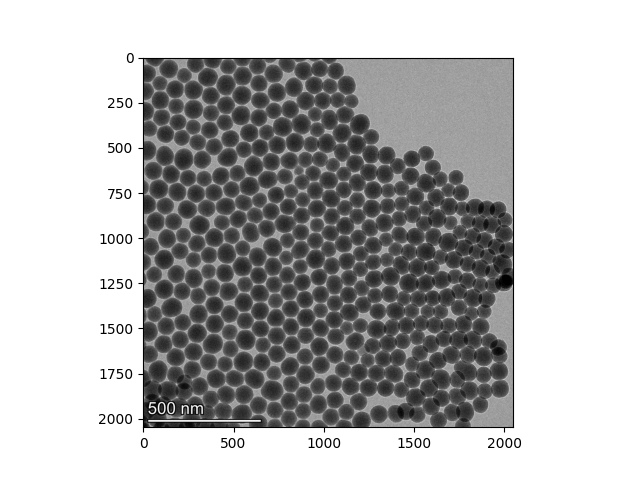

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image, cmap='gray')

plt.show()

## Gaussian smoothing 

Convolution of the image with a Gaussian kernel ==> Reduce noise at the cost of blurring

In [151]:
# 3x3 kernel of sigma = 1 pixel
gaussian_kernel_3x3 = np.array([[1, 2, 1], [1, 4, 1], [1, 2, 1]])
print(gaussian_kernel_3x3)

[[1 2 1]
 [1 4 1]
 [1 2 1]]


In [152]:
gaussian_kernel_3x3_norm = gaussian_kernel_3x3 / np.sum(gaussian_kernel_3x3)
print(gaussian_kernel_3x3_norm)

[[0.07142857 0.14285714 0.07142857]
 [0.07142857 0.28571429 0.07142857]
 [0.07142857 0.14285714 0.07142857]]


In [153]:
image_smooth_3x3 = signal.convolve2d(image, gaussian_kernel_3x3_norm)

<IPython.core.display.Javascript object>


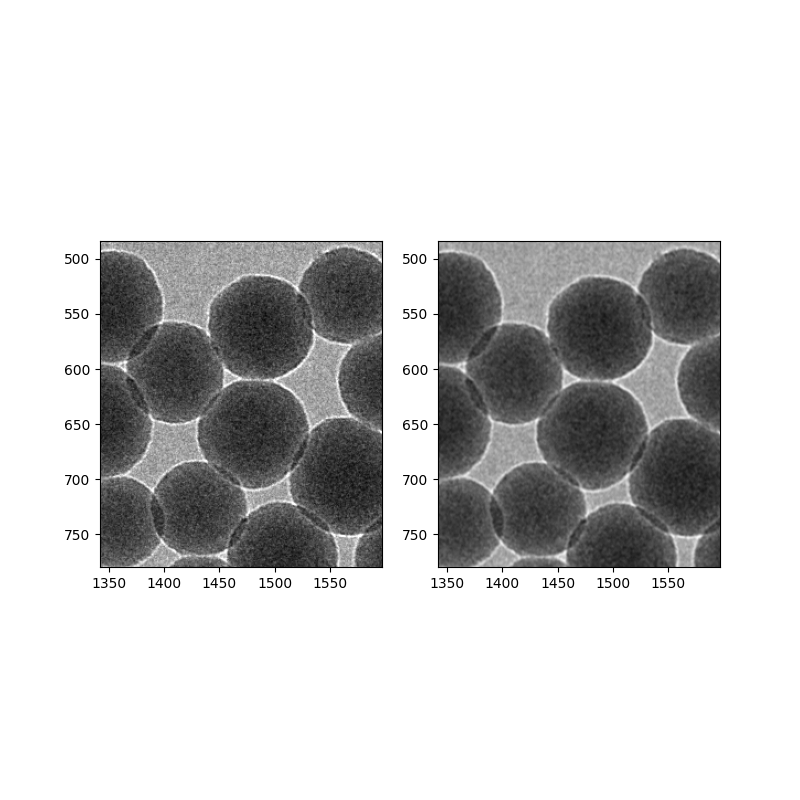

In [154]:
fig = plt.figure(figsize=(8, 8))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122, sharex=ax_left, sharey=ax_left)
ax_left.imshow(image, cmap='gray')
ax_right.imshow(image_smooth_3x3, cmap='gray')

plt.show()

In [155]:
# 5x5 kernel of sigma = 1 pixel
gaussian_kernel_5x5 = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])
gaussian_kernel_5x5_norm = gaussian_kernel_5x5 / np.sum(gaussian_kernel_5x5)
print(gaussian_kernel_5x5, '\n', gaussian_kernel_5x5_norm)

[[ 1  4  7  4  1]
 [ 4 16 26 16  4]
 [ 7 26 41 26  7]
 [ 4 16 26 16  4]
 [ 1  4  7  4  1]] 
 [[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


In [156]:
image_smooth_5x5 = signal.convolve2d(image, gaussian_kernel_5x5_norm)

<IPython.core.display.Javascript object>


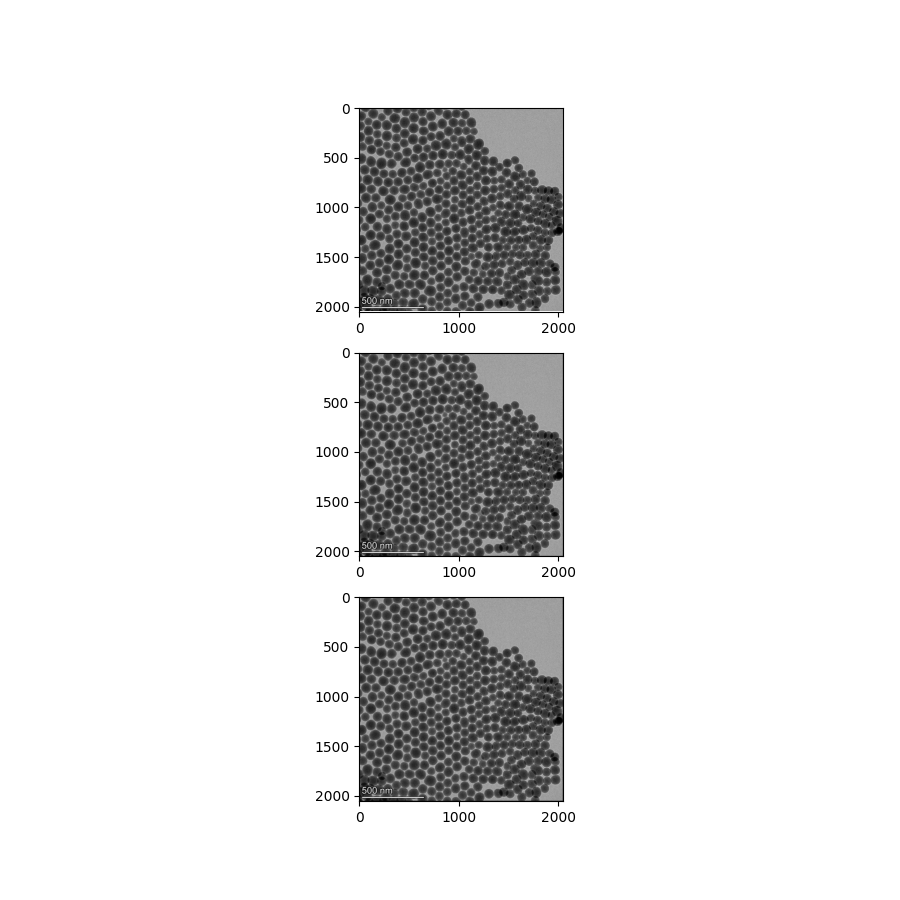

In [157]:
fig = plt.figure(figsize=(9,9))
ax_up = fig.add_subplot(311)
ax_middle = fig.add_subplot(312, sharex=ax_up, sharey=ax_up) 
ax_down = fig.add_subplot(313, sharex=ax_up, sharey=ax_up)
ax_up.imshow(image, cmap='gray')
ax_middle.imshow(image_smooth_3x3, cmap='gray')
ax_down.imshow(image_smooth_5x5, cmap='gray')

plt.show()

In [158]:
image_smooth_sigma_1 = filters.gaussian(image, sigma=1, preserve_range=True)
image_smooth_sigma_2 = filters.gaussian(image, sigma=2, preserve_range=True)
image_smooth_sigma_4 = filters.gaussian(image, sigma=4, preserve_range=True)
image_smooth_sigma_0x2 = filters.gaussian(image, sigma=[0,2], preserve_range=True)
image_smooth_sigma_2x0 = filters.gaussian(image, sigma=[2,0], preserve_range=True)
image_smooth_sigma_5x2 = filters.gaussian(image, sigma=[5,2], preserve_range=True)

<IPython.core.display.Javascript object>


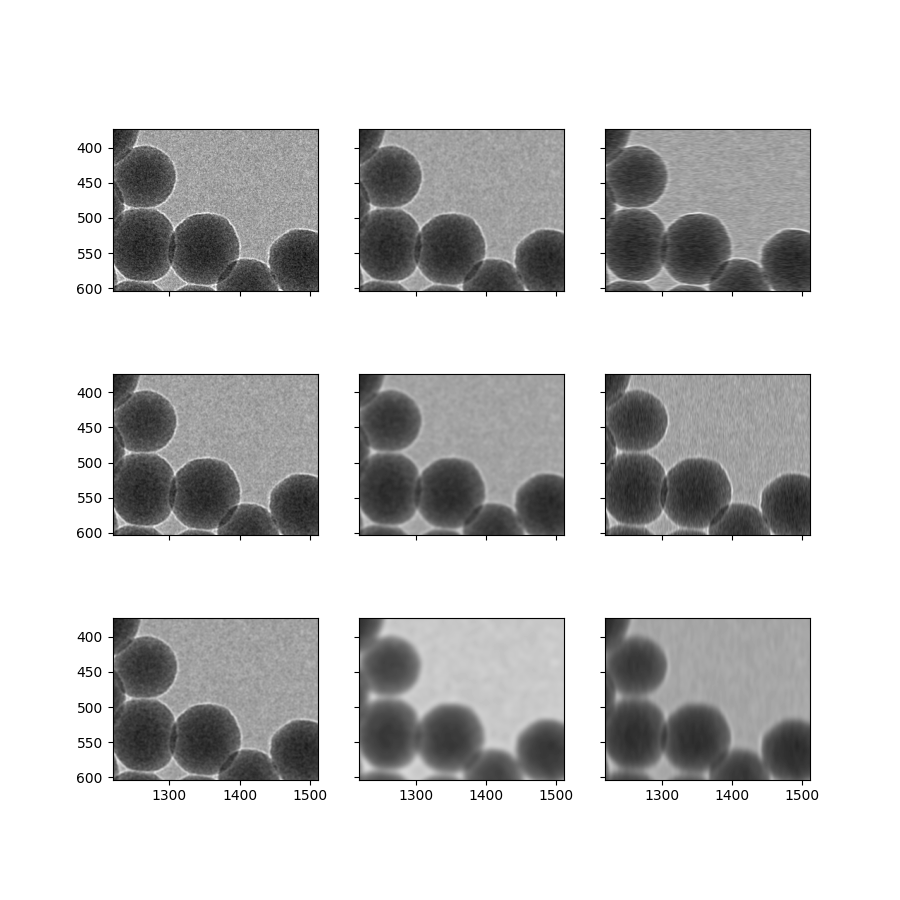

In [159]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9,9))
axs[0, 0].imshow(image, cmap='gray')
axs[1, 0].imshow(image_smooth_3x3, cmap='gray')
axs[2, 0].imshow(image_smooth_5x5, cmap='gray')
axs[0, 1].imshow(image_smooth_sigma_1, cmap='gray')
axs[1, 1].imshow(image_smooth_sigma_2, cmap='gray')
axs[2, 1].imshow(image_smooth_sigma_4, cmap='gray')
axs[0, 2].imshow(image_smooth_sigma_0x2, cmap='gray')
axs[1, 2].imshow(image_smooth_sigma_2x0, cmap='gray')
axs[2, 2].imshow(image_smooth_sigma_5x2, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


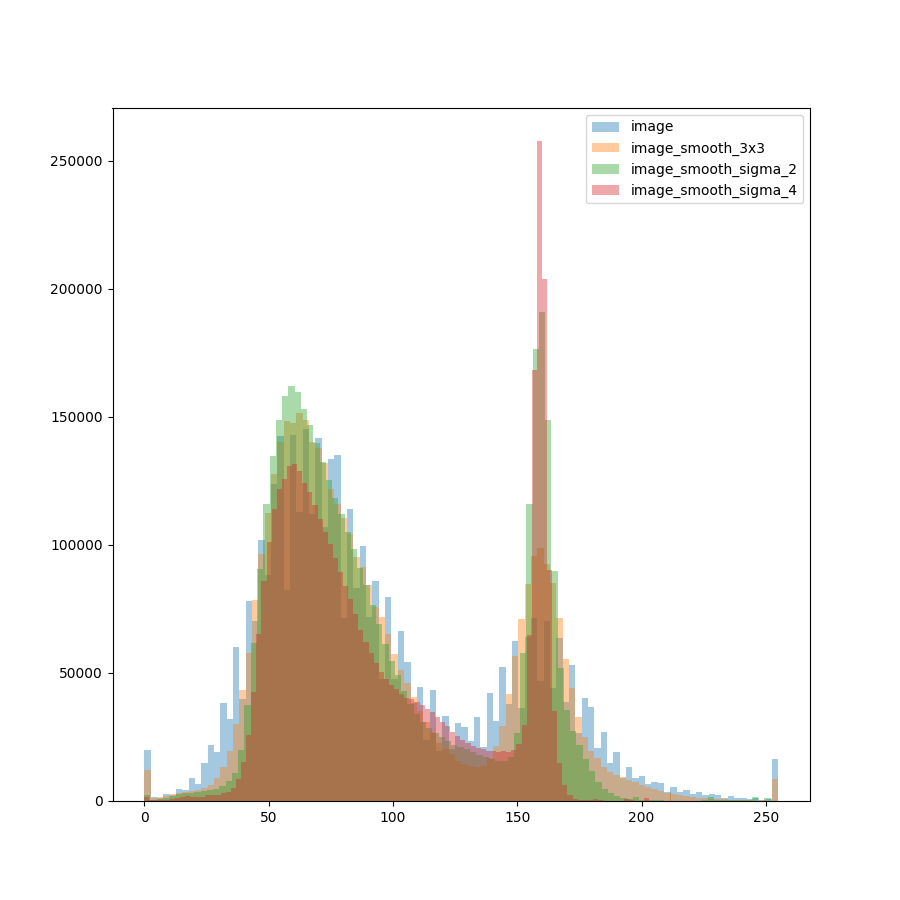

In [160]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.hist(image.ravel(), 100, label='image', alpha=0.4)
ax.hist(image_smooth_3x3.ravel(), 100, alpha=0.4, label='image_smooth_3x3')
ax.hist(image_smooth_sigma_2.ravel(), 100, alpha=0.4, label='image_smooth_sigma_2')
ax.hist(image_smooth_sigma_4.ravel(), 100, alpha=0.4, label='image_smooth_sigma_4')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


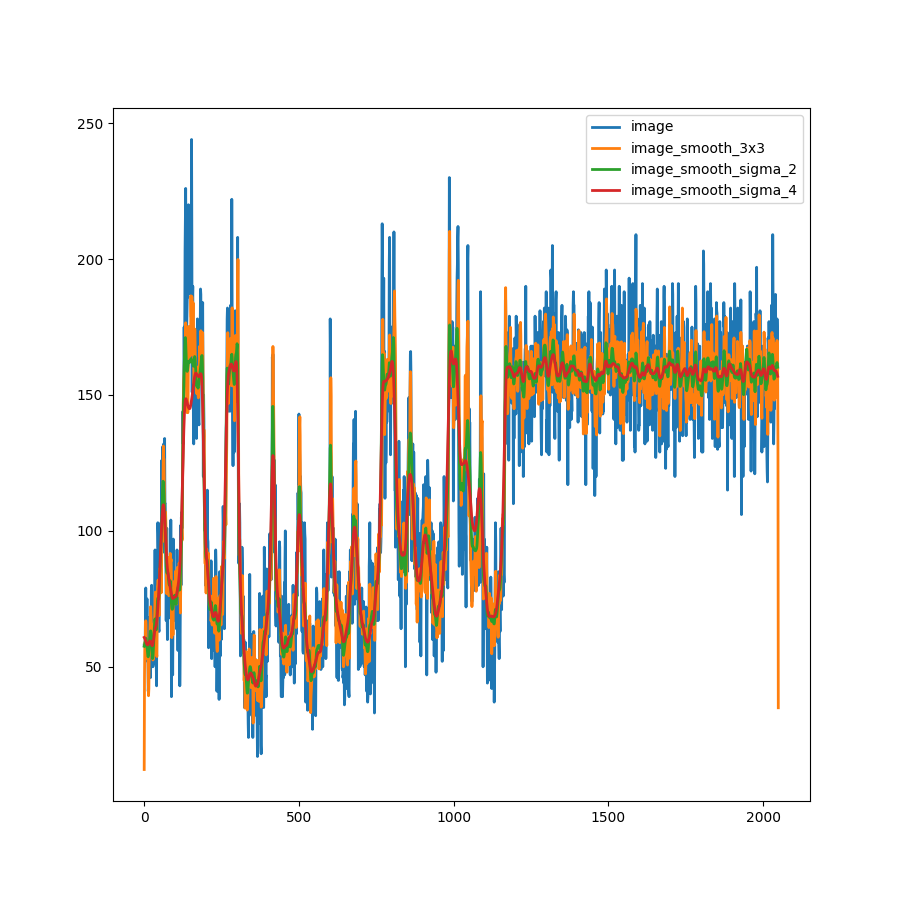

In [162]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(image[120, :], linewidth=2, label='image')
ax.plot(image_smooth_3x3[120, :], linewidth=2, label='image_smooth_3x3')
ax.plot(image_smooth_sigma_2[120, :], linewidth=2, label='image_smooth_sigma_2')
ax.plot(image_smooth_sigma_4[120, :], linewidth=2, label='image_smooth_sigma_4')
ax.legend()

plt.show()

## Binarization

<IPython.core.display.Javascript object>


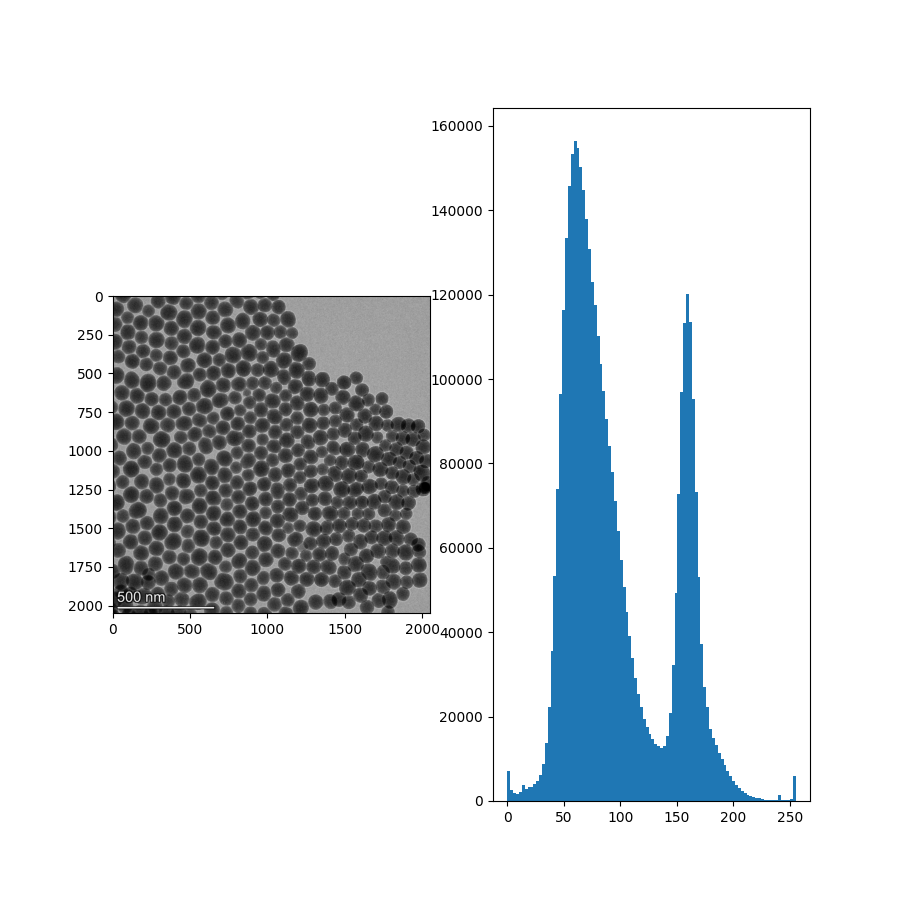

In [163]:
fig = plt.figure(figsize=(9,9))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122)
ax_left.imshow(image_smooth_sigma_1, cmap='gray')
ax_right.hist(image_smooth_sigma_1.ravel(), 100)
plt.show()

In [177]:
image_threshold = image_smooth_sigma_1 > 135
print(image_threshold)

[[False False  True ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True False  True]
 [False False False ...  True  True False]
 [False False False ...  True  True  True]]


In [178]:
image_threshold = image_threshold.astype(int)
print(image_threshold)

[[0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]]


<IPython.core.display.Javascript object>


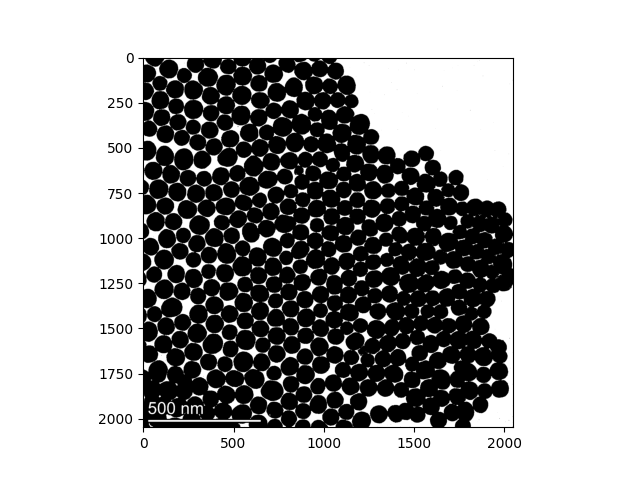

In [179]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold, cmap='gray')

plt.show()

In [180]:
otsu = filters.threshold_otsu(image_smooth_sigma_1)
image_threshold_otsu = image_smooth_sigma_1 > otsu
print(otsu)

114.052734375


In [181]:
iso_data = filters.threshold_isodata(image_smooth_sigma_1)
image_threshold_iso_data = image_smooth_sigma_1 > iso_data
print(iso_data)

114.052734375


In [182]:
yen = filters.threshold_yen(image_smooth_sigma_1)
image_threshold_yen = image_smooth_sigma_1 > yen
print(yen)

94.130859375


<IPython.core.display.Javascript object>


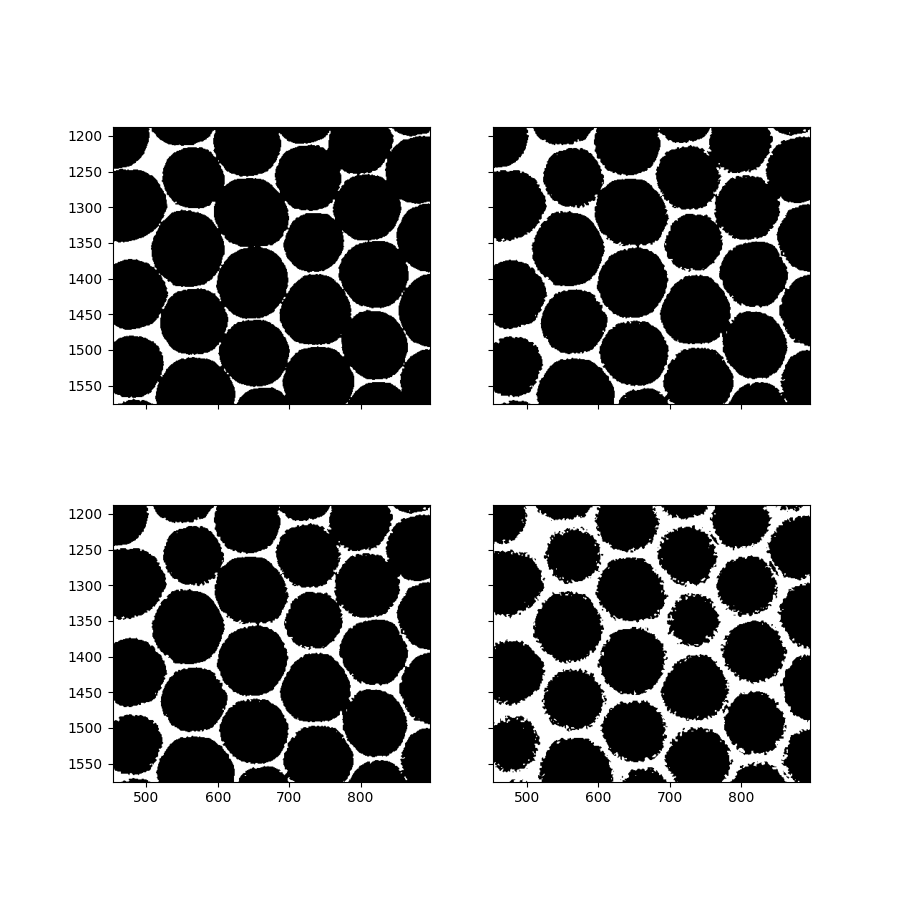

In [183]:
fig, axs = plt.subplots(2, 2, figsize=(9,9), sharex=True, sharey=True)
axs[0,0].imshow(image_threshold, cmap='gray') 
axs[1,0].imshow(image_threshold_otsu, cmap='gray')
axs[0,1].imshow(image_threshold_iso_data, cmap='gray') 
axs[1,1].imshow(image_threshold_yen, cmap='gray')
plt.show()

In [184]:
image_threshold_alt = np.where(image_smooth_sigma_1 > 135, 1, 0)
print(image_threshold_alt)

[[0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]]


<IPython.core.display.Javascript object>


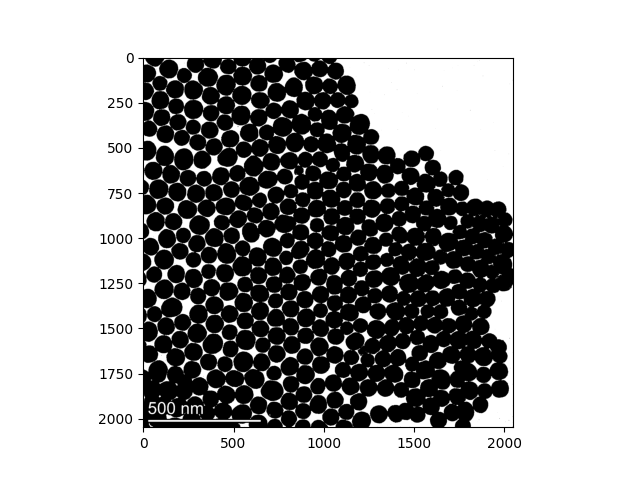

In [185]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold_alt, cmap='gray')

plt.show()

In [186]:
image_threshold_local = filters.threshold_local(image_smooth_sigma_1, block_size=15)
print(image_threshold_local)

[[133.02992988 134.83643255 138.3522931  ... 154.31983765 154.67021223
  155.03644847]
 [132.79293863 134.54106077 137.95016338 ... 154.74270549 155.01012946
  155.32683682]
 [132.72957133 134.34947995 137.52583268 ... 155.6373838  155.76812374
  155.99772969]
 ...
 [ 12.45900091  12.05810135  11.31694117 ... 145.34029394 143.60044141
  142.65801415]
 [ 13.51969465  13.05356552  12.18883306 ... 144.84486991 143.03428337
  142.03563933]
 [ 14.10210538  13.59944584  12.66609449 ... 144.68870116 142.86654559
  141.84855843]]


<IPython.core.display.Javascript object>


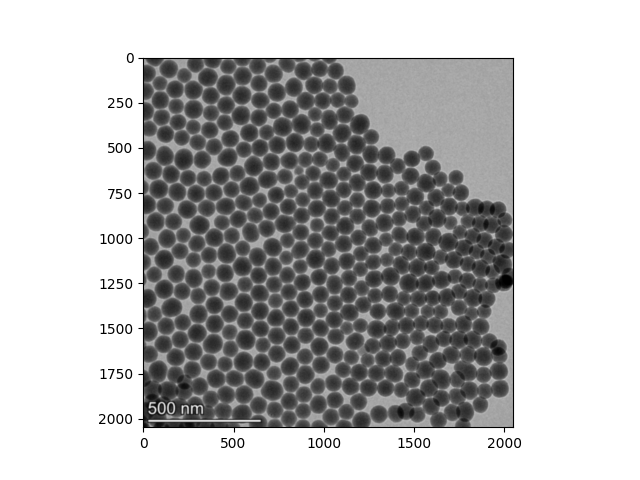

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold_local, cmap='gray')

plt.show()

In [188]:
block_size = 15
local_thresh = filters.threshold_local(image_smooth_sigma_1, block_size, offset=10)
binary_local = image_smooth_sigma_1 > local_thresh
binary_local = binary_local.astype(int)

print(binary_local)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


<IPython.core.display.Javascript object>


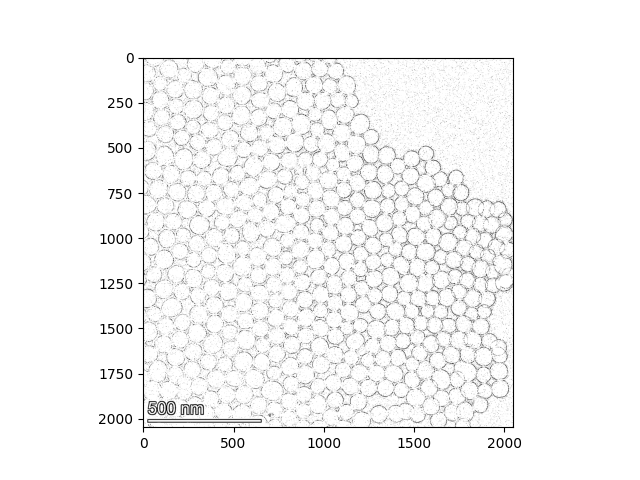

In [189]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(binary_local, cmap='gray')

plt.show()